# 6.5 Second part task: Clustering: Airbnb Mallorca

## Table of Contents
### 1. Importing libraries and dataset
### 2. Preparing dataset for clustering
### 3. The Elbow Technique
### 4. k-means clustering

### 1. Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler # to standardize the data
from sklearn.decomposition import PCA
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\svand\Documents\15-04-2024 Airbnb Mallorca'

In [5]:
# importing dataframe

df_v7 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'listings_v7.csv'), index_col = 0)

In [6]:
df_v7.head()

,id,listing_url,name,picture_url,host_since,host_is_superhost,neighbourhood,latitude,longitude,property_type,...,review_scores_location,review_scores_value,reviews_per_month,price_without_symbol,estimation_booking_category,swimming_pool,close_to_beach,mountain_view,with_garden,patio_or_balcony
0,18184333,https://www.airbnb.com/rooms/18184333,Quinze Germans,https://a0.muscache.com/pictures/prohost-api/H...,2016-06-30,0,Andratx,39.543490,2.390930,Entire home,...,4.94,4.28,0.23,190.0,low in bookings,0,0,0,1,1
1,664248507739787372,https://www.airbnb.com/rooms/664248507739787372,Villa Alcanada Mar,https://a0.muscache.com/pictures/prohost-api/H...,2022-05-05,0,Alcúdia,39.836700,3.151310,Entire villa,...,5.00,5.00,0.09,579.0,low in bookings,1,1,0,1,0
2,629002706694235276,https://www.airbnb.com/rooms/629002706694235276,"Villa Beach Alcudia, near the beach with jacuzzi",https://a0.muscache.com/pictures/miso/Hosting-...,2018-02-13,0,Alcúdia,39.824417,3.114876,Entire home,...,5.00,5.00,0.47,450.0,average in bookings,0,1,0,1,1
3,1006393514540791109,https://www.airbnb.com/rooms/1006393514540791109,Habitación matrimonial con A/C,https://a0.muscache.com/pictures/miso/Hosting-...,2019-11-20,0,Palma de Mallorca,39.553815,2.692827,Private room in rental unit,...,5.00,4.00,0.77,52.0,low in bookings,0,1,0,1,1
4,41395364,https://www.airbnb.com/rooms/41395364,SANTA CATALINA PENTHOUSE,https://a0.muscache.com/pictures/8bda3e0a-3dd7...,2014-06-19,0,Palma de Mallorca,39.571850,2.634970,Entire rental unit,...,4.77,4.50,1.21,67.0,average in bookings,0,0,0,0,0


### 2. Preparing dataset for clustering

##### In order to conduct a solid cluster analysis, I will will only use columns with continuous numeric values. I will also standardize the data so all variables are considered by the algorithm with equal importance. 

In [7]:
# create a new subset without the boolean numeric values and the reviews per month:

sub_clusters2 = df_v7[['nr_of_guests', 'price_without_symbol', 'minimum_nights', 'availability_365', 'number_of_reviews', 'nr_of_reviews_last12months', 'review_scores_rating', 'review_scores_location']]

In [8]:
sub_clusters2

,nr_of_guests,price_without_symbol,minimum_nights,availability_365,number_of_reviews,nr_of_reviews_last12months,review_scores_rating,review_scores_location
0,4,190.0,1,207,18,3,4.56,4.94
1,10,579.0,6,45,1,1,5.00,5.00
2,8,450.0,6,309,10,4,5.00,5.00
3,2,52.0,3,69,2,2,5.00,5.00
4,3,67.0,30,266,60,14,4.62,4.77
...,...,...,...,...,...,...,...,...
11972,2,91.0,3,318,17,6,4.82,4.53
11973,5,115.0,1,362,1,1,5.00,5.00
11974,6,164.0,1,307,15,1,4.80,4.80
11975,4,75.0,7,197,17,8,4.94,4.94


In [9]:
sub_clusters2.describe()

,nr_of_guests,price_without_symbol,minimum_nights,availability_365,number_of_reviews,nr_of_reviews_last12months,review_scores_rating,review_scores_location
count,11964.000000,11964.000000,11964.000000,11964.000000,11964.000000,11964.000000,11964.000000,11964.000000
mean,5.488549,227.735122,3.899365,190.602808,27.442494,7.561351,4.706352,4.705853
std,2.620775,234.198877,7.134506,100.422998,45.954603,10.998271,0.380874,0.344808
min,1.000000,10.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,4.000000,110.000000,1.000000,109.000000,4.000000,1.000000,4.590000,4.580000
50%,6.000000,166.000000,3.000000,188.000000,11.000000,4.000000,4.820000,4.800000
75%,7.000000,257.000000,5.000000,267.000000,31.000000,10.000000,5.000000,4.970000
max,16.000000,3960.000000,365.000000,365.000000,781.000000,244.000000,5.000000,5.000000


### Standardizing the data

In [10]:
# define standard scaler 

scaler = StandardScaler()

In [11]:
# transform data 
sub_clusters2_scaled = scaler.fit_transform(sub_clusters2)

In [12]:
sub_clusters2_scaled

array([[-0.56800411, -0.161131  , -0.40640316, ..., -0.41475077,
        -0.38426766,  0.67909146],
       [ 1.72149036,  1.49991991,  0.29444546, ..., -0.59660514,
         0.77101744,  0.85310845],
       [ 0.95832553,  0.94908298,  0.29444546, ..., -0.32382359,
         0.77101744,  0.85310845],
       ...,
       [ 0.19516071, -0.2721524 , -0.40640316, ..., -0.59660514,
         0.24588785,  0.27305182],
       [-0.56800411, -0.65218718,  0.43461519, ...,  0.03988514,
         0.61347857,  0.67909146],
       [-0.56800411, -0.43868449,  3.79868857, ..., -0.59660514,
         0.77101744,  0.85310845]])

### 3. The Silhouette Score

To choose the optimum number of clusters, I will use the Silhouette Score method. The optimal number of clusters maximizes the silhouette score.

In [13]:
# import warnings to avoid future warning messages

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [14]:
# Define a function to plot the silhouette scores
def plot_silhouette_scores(df_scaled, range_n_clusters):
    silhouette_scores = []  # Store the silhouette scores for different numbers of clusters
    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters)
        preds = clusterer.fit_predict(df_scaled)
        score = silhouette_score(df_scaled, preds)
        silhouette_scores.append(score)

    # Plot the silhouette scores
    plt.figure(figsize=(14, 6))
    plt.plot(range_n_clusters, silhouette_scores, 'bx-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

    # The optimal number of clusters maximizes the silhouette score
    optimal_k = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
    print("Optimal number of clusters for K-Means: ", optimal_k)
    return optimal_k

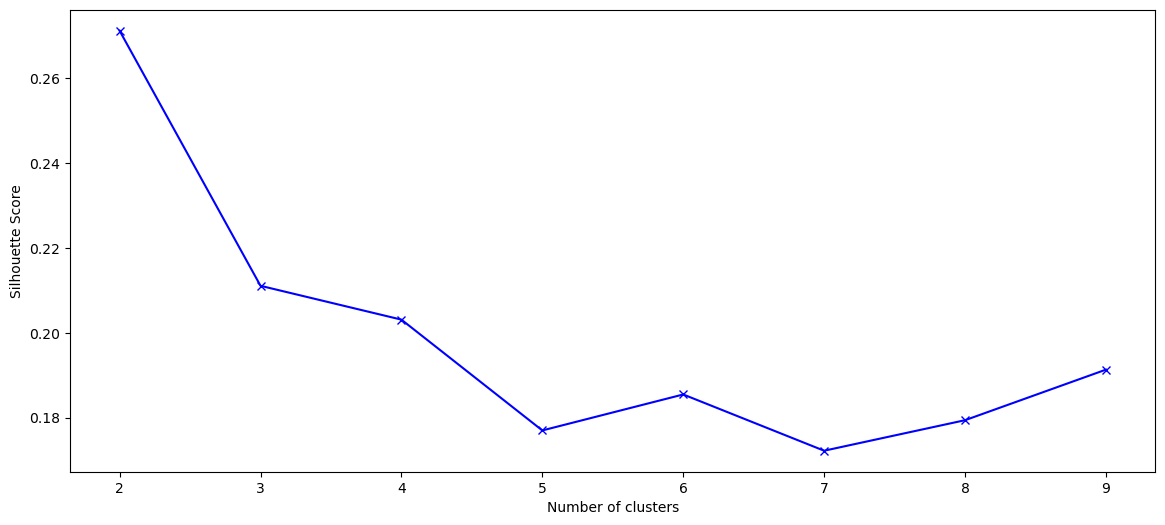

Optimal number of clusters for K-Means:  2


In [15]:
# Determine the optimal no of clusters for K-Means
range_n_clusters = list(range(2,10))
optimal_k = plot_silhouette_scores(sub_clusters2_scaled, range_n_clusters)

In [16]:
# Define a function to apply a clustering algorithm and plot the results
def apply_clustering(df_scaled, df, algorithm, name, **kwargs):
    # Apply the algorithm
    clusterer = algorithm(**kwargs)
    clusterer.fit(df_scaled)
    labels = clusterer.labels_
    # Estimate number of clusters
    n_clus = len(set(labels)) 
    print('Estimated no. of clusters for {}: {}'.format(name, n_clus))

    # Create a column for the clusters in the original dataframe
    df[name + "_cluster"] = labels

    # Reduce the dimensionality of the data to 2D
    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(df_scaled)

    # Plot the clusters
    plt.figure(figsize=(14, 6))
    scatter = plt.scatter(df_pca[:,0], df_pca[:,1], c=labels)
    plt.title('Clusters determined by ' + name)
    # Create a legend for the plot
    legend = plt.legend(*scatter.legend_elements(),
                        loc="upper right", title="Clusters")
    plt.gca().add_artist(legend)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()
    return labels

Estimated no. of clusters for K-Means: 2


C:\Users\svand\AppData\Local\Temp\ipykernel_12528\2117565619.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name + "_cluster"] = labels


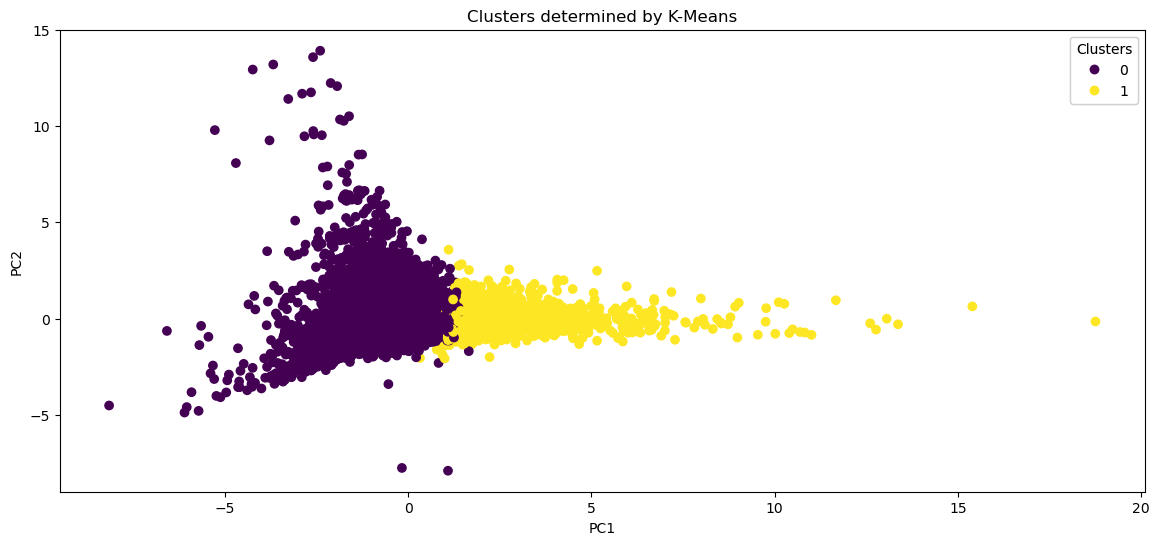

In [17]:
# Apply K-Means with the optimal no of clusters
labels_kmeans = apply_clustering(sub_clusters2_scaled, sub_clusters2, KMeans, 'K-Means', n_clusters=optimal_k)

In [18]:
# Aggregate all the columns for kmeans clusters
columns = [col for col in sub_clusters2.columns if col not in 'K-Means_cluster']
agg_dict = {col: ['mean', 'median'] for col in columns}
sub_clusters2.groupby('K-Means_cluster').agg(agg_dict)

nr_of_guests        price_without_symbol         \
                        mean median                 mean median   
K-Means_cluster                                                   
0                   5.772033    6.0           243.691014  178.0   
1                   3.596536    4.0           121.243105  101.0   

                minimum_nights        availability_365         \
                          mean median             mean median   
K-Means_cluster                                                 
0                     3.902259    2.0       189.515617  184.0   
1                     3.880051    3.0       197.858884  204.0   

                number_of_reviews        nr_of_reviews_last12months         \
                             mean median                       mean median   
K-Means_cluster                                                              
0                       14.844594    9.0                   4.602787    3.0   
1                      111.522771   92.0                  27.307248   23.0   

                review_scores_rating        review_scores_location         
                                mean median                   mean median  
K-Means_cluster                                                            
0                           4.695255   4.82               4.696669   4.79  
1                           4.780411   4.82               4.767152   4.81

In [20]:
#export dataset

sub_clusters2.to_csv(os.path.join(path, '02 Data','Prepared Data', 'sub_clusters2.csv'))

In [22]:
sub_clusters2.to_clipboard()

### The insights from the two K-Means cluster groups can be summarized as follows:

#### Cluster 0:
* Number of Guests: On average, accommodations in this cluster cater to a larger group of guests, with a mean of approximately 5.77 and a median of 6 guests.
* Price: The average price is higher at about $243.69, with a median of $178.
* Minimum Nights: The mean and median minimum nights are relatively low, at 3.90 and 2 nights respectively, suggesting short stays are common.
* Availability: These listings are available for around half the year, with a mean of 189.52 days and a median of 184 days.
* Number of Reviews: They have a lower number of reviews on average (14.84) and a median of 9 reviews.
* Recent Reviews: There are fewer recent reviews in the last 12 months, with a mean of 4.60 and a median of 3.
* Review Scores: The rating scores are slightly lower, with a mean rating of 4.69 and location score of 4.70.

#### Cluster 1:
* Number of Guests: Accommodations in this cluster are suited for smaller groups, with a mean of 3.60 and a median of 4 guests.
* Price: The average price is lower at about $121.24, with a median of $101.
* Minimum Nights: Similar to Cluster 0, the mean and median minimum nights are 3.88 and 3 nights, indicating short-term stays.
* Availability: These listings are available slightly more throughout the year, with a mean of 197.86 days and a median of 204 days.
* Number of Reviews: They have a significantly higher number of reviews, with a mean of 111.52 and a median of 92 reviews.
* Recent Reviews: There are more recent reviews, with a mean of 27.31 and a median of 23.
* Review Scores: The review scores are marginally higher, with a mean rating of 4.78 and location score of 4.77.

#### Recommendation:

If the goal is to cater to larger groups and charge a premium price, accommodations from Cluster 0 would be suitable.
For targeting smaller groups or individuals, offering more competitive pricing, and potentially having a higher turnover due to more reviews, accommodations from Cluster 1 would be appropriate.